# Exploring trip data of Ford go bike 
## by (Omar Aref)

## Preliminary Wrangling

> Data set consists of 180K+ records with 22 columns represnting the duration , data , station , gender and customer type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.shape


(183412, 16)

In [5]:
df.duplicated().sum()

0

### What is the structure of your dataset?

> Our data set has 180k+ rows and 22 columns which represent gender , start and end time , trip duration , station information and user types.

### What is/are the main feature(s) of interest in your dataset?

> I am interested mainly in describing and predicting the trip duration per user.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Gender , user type , birth year , station locations.

<br>

In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Data Wrangling:

1) We will drop the NAN values since they represent a small proportion of our data set and gender and birth year cannot be infered from other variables.

In [7]:
df.dropna(inplace = True)

<br>2) Converting birth year , start station id and end station id to Ints instead of floats.

In [8]:
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)
df['member_birth_year'] = df['member_birth_year'].astype(int)

3) Converting the duration to Minutes for convenience:

In [9]:
df['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

Minimun duration is 61 seconds which is approximately equal to 1 minute. we will keep 2 decimal places for approximation.

In [10]:
df['duration_min'] = round(df['duration_sec']/60 , 2)

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.75
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.90
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.17
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.42
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.88


In [12]:
df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [13]:
group = df.groupby(['start_station_name' , 'end_station_name']).count().rename({'start_time' : 'count'} , axis = 1)['count'].reset_index(level = ['start_station_name' , 'end_station_name'])
group.head()



,start_station_name,end_station_name,count
0,10th Ave at E 15th St,10th Ave at E 15th St,2
1,10th Ave at E 15th St,10th St at Fallon St,4
2,10th Ave at E 15th St,13th St at Franklin St,1
3,10th Ave at E 15th St,21st Ave at International Blvd,1
4,10th Ave at E 15th St,23rd Ave at Foothill Blvd,1


In [14]:
group.duplicated().sum()

0

In [15]:
group_filtered = group.loc[group['count'] >8]

In [16]:
group_filtered['count'].describe()

count    5189.000000
mean       23.550780
std        25.261019
min         9.000000
25%        11.000000
50%        15.000000
75%        25.000000
max       327.000000
Name: count, dtype: float64

In [17]:
group_filtered = group_filtered.loc[group_filtered['count'] >100]

In [18]:
group_filtered['count'].describe()

count    107.000000
mean     153.271028
std       50.021047
min      101.000000
25%      115.500000
50%      139.000000
75%      167.000000
max      327.000000
Name: count, dtype: float64

In [19]:
group_filtered['count']

31       110
486      154
1736     138
1744     123
1750     283
        ... 
21127    117
21192    260
22377    118
22917    159
23127    101
Name: count, Length: 107, dtype: int64

In [20]:
df['member_birth_year'].value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
        ...  
1878        1
1930        1
1928        1
1927        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

In [21]:
df['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [22]:
df['end_station_latitude'].mean()

37.77141422805962

In [23]:
df['end_station_latitude'].std()

0.1002953165913285

In [24]:
df['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [25]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int32
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int32
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int32
member_gender               object
bike_share_for_all_trip     object
duration_min               float64
dtype: object

In [26]:
df['start_time']= pd.to_datetime(df['start_time'])

In [27]:
df['end_time']= pd.to_datetime(df['end_time'])

<br>

**Wrangling is done, and Data is cleaned.**



# Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## We Will start by exploring the Birth year distributions:

In [28]:
birthYears = df['member_birth_year'].value_counts()
order_index = np.sort(birthYears.index)

Text(0.5, 0, 'Birth year')

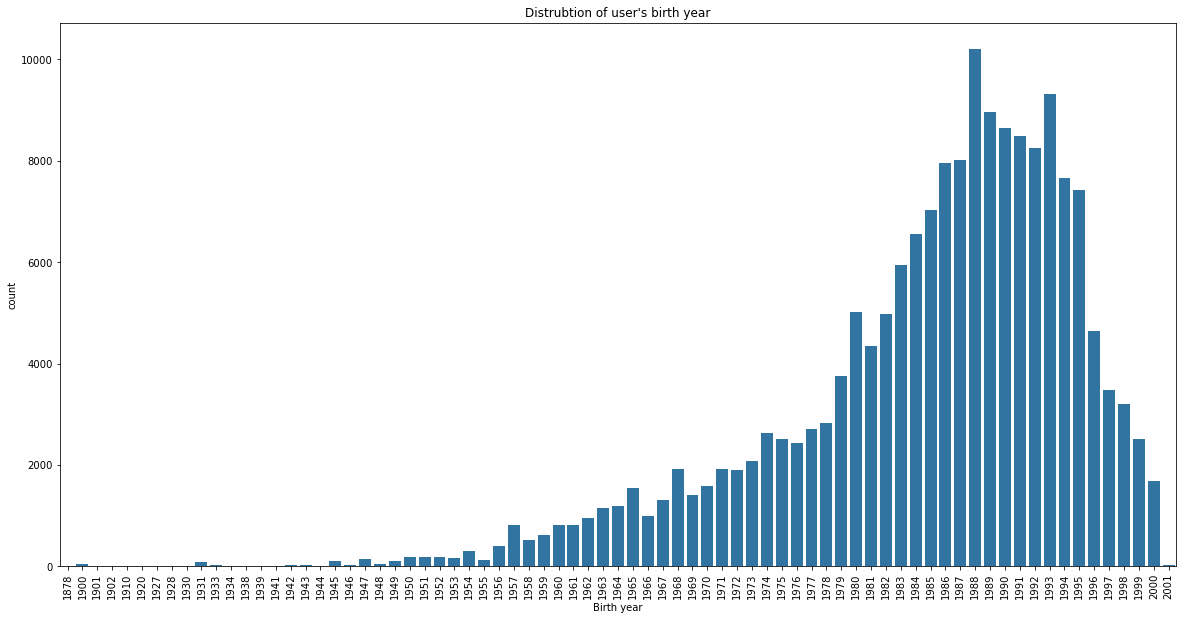

In [29]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(20 , 10))
plt.xticks(rotation = 90)
plt.title("Distrubtion of user's birth year")
sb.countplot(data = df , x = 'member_birth_year', color = base_color , order = order_index );
plt.xlabel('Birth year')


## It is observered that most of the users are born after 1950 ; so we will limit the graph to only include the after 1950 births.

Text(0.5, 0, 'Birth year')

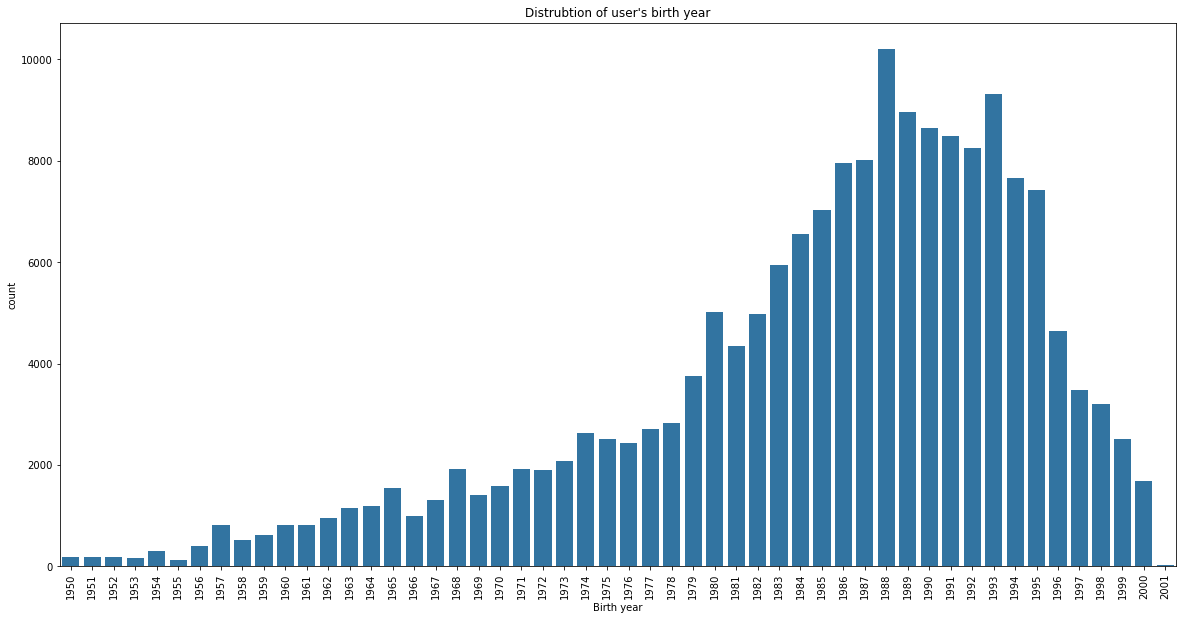

In [30]:

base_color = sb.color_palette()[0]
plt.figure(figsize=(20 , 10))
plt.xticks(rotation = 90)
plt.title("Distrubtion of user's birth year")
sb.countplot(data = df , x = 'member_birth_year', color = base_color , order = order_index[23:] )
plt.xlabel('Birth year')


## We will move on now to explore the Trip durations and we plot the distribution: 

In [31]:
df['duration_min'].describe()

count    174952.000000
mean         11.733373
std          27.370085
min           1.020000
25%           5.380000
50%           8.500000
75%          13.150000
max        1409.130000
Name: duration_min, dtype: float64

In [32]:
bins = np.arange(1 , 1411  , 94 );

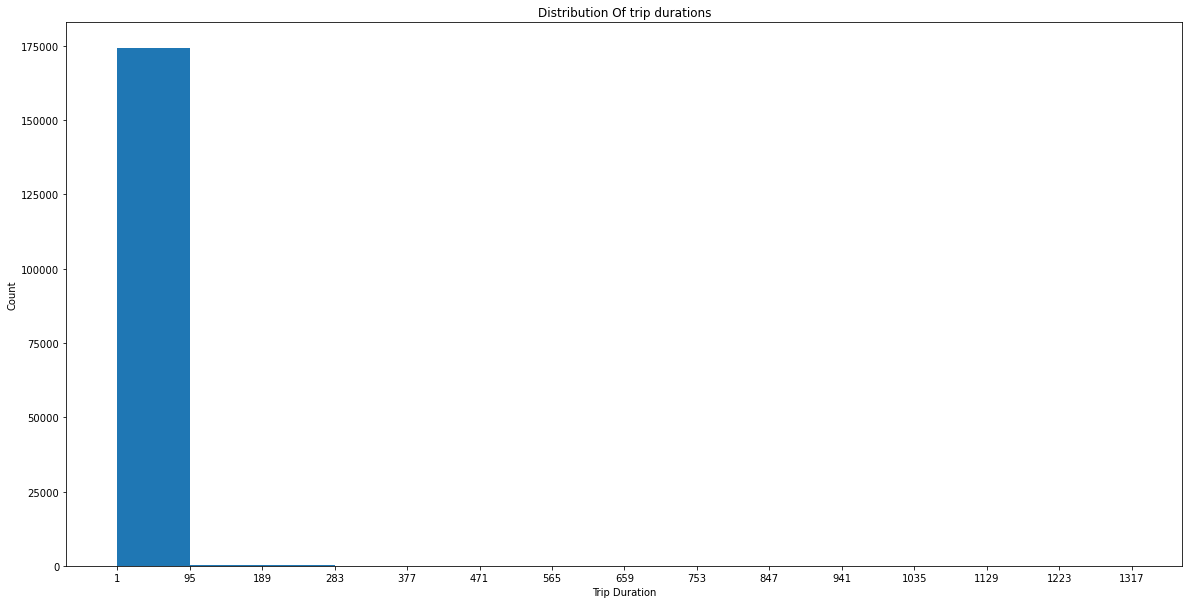

In [33]:
plt.figure(figsize=(20,10))
plt.xlabel("Trip Duration")
plt.ylabel("Count")
plt.title("Distribution Of trip durations")
plt.hist(data = df , x = 'duration_min' , bins = bins );
plt.xticks(bins);


The majority or we could say all of the durations are between 1 and 95 , we will zoom on this section .

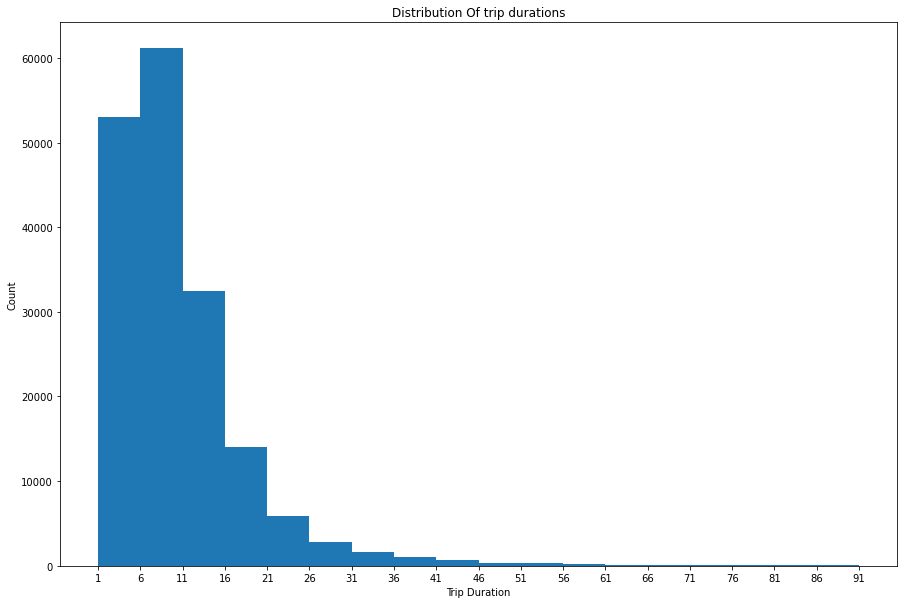

In [34]:
bins = np.arange(1 , 96  , 5 );
plt.figure(figsize=(15,10))
plt.hist(data = df , x = 'duration_min' , bins = bins );
plt.xlabel("Trip Duration")
plt.ylabel("Count")
plt.title("Distribution Of trip durations")
plt.xticks(bins);

We can see the majority of the distribution is between 1 and 26, we will zoom even more.

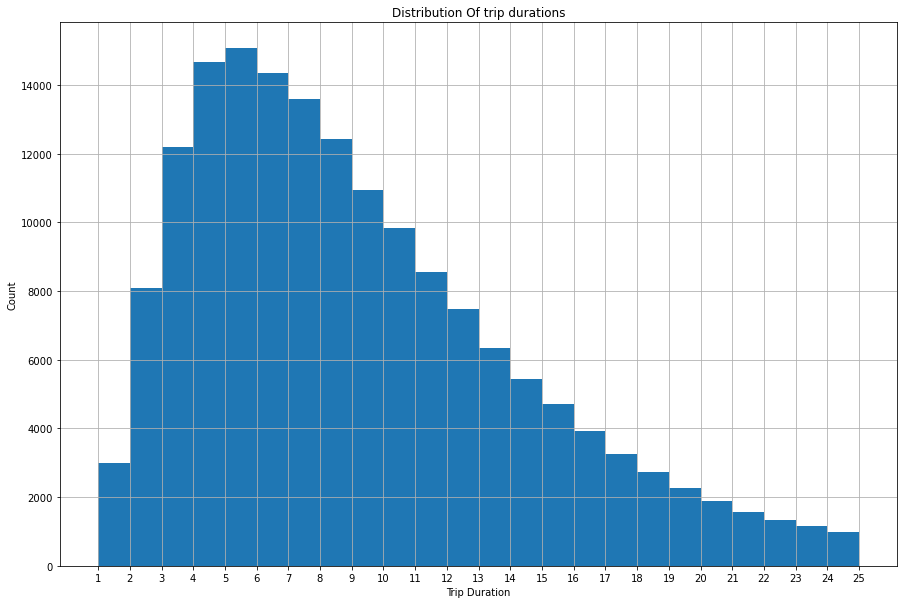

In [35]:
bins = np.arange(1 , 26 , 1 );
plt.figure(figsize=(15,10))
plt.hist(data = df , x = 'duration_min' , bins = bins );
plt.xlabel("Trip Duration")
plt.ylabel("Count")
plt.title("Distribution Of trip durations")
plt.xticks(bins);
plt.grid()

Here we can see the distribution of mins, the mmajority of the users have trip times between 4 and 7 mins, we add grid lines to see the results better to not strain the eyes.

We could also conclude that there are w little number of outliers in our dataset, We will consider them moving forward.

## We will now see the distribution of the starting date years. 

Note: as concluded form above, the duration of mostly all trips is 91 mins which is less than 2 hours, so we will assume the start date is equal to the end date.

In [36]:
df['start_year']  = df['start_time'].dt.year


In [37]:
df['start_year'].describe()

count    174952.0
mean       2019.0
std           0.0
min        2019.0
25%        2019.0
50%        2019.0
75%        2019.0
max        2019.0
Name: start_year, dtype: float64

We could see that all of our data is in 2019, so we will plot the distribution of months instead

In [38]:
df['month']  = df['start_time'].dt.month

In [39]:
df['month'].describe()

count    174952.0
mean          2.0
std           0.0
min           2.0
25%           2.0
50%           2.0
75%           2.0
max           2.0
Name: month, dtype: float64

We could see that all of our data is in feburary , so we will plot the distribution of days of the week instead instead

In [40]:
df['start_day'] = df['start_time'].dt.dayofweek

In [41]:
start_days = df['start_day'].value_counts()
order_index = np.sort(start_days.index)

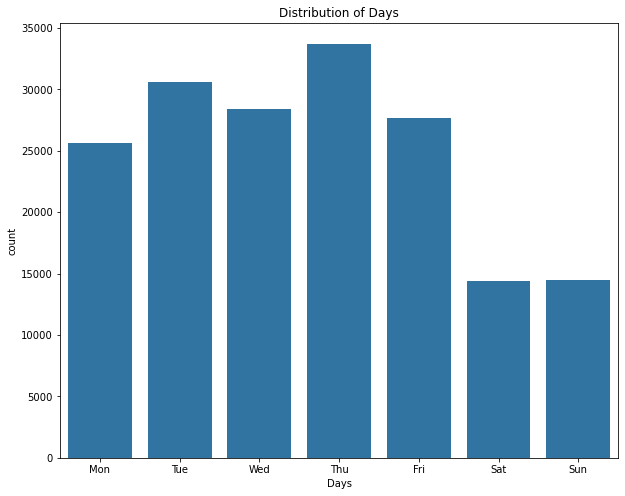

In [42]:

base_color = sb.color_palette()[0]
plt.figure(figsize=(10 ,8))
ax = sb.countplot(data = df , x = 'start_day', color = base_color , order = order_index )
plt.xticks([0,1,2,3,4,5,6] , ['Mon' , 'Tue' , 'Wed' , 'Thu' , 'Fri' , 'Sat' , 'Sun'])
plt.title("Distribution of Days")
plt.xlabel("Days");

We see that the weekdays monday to friday have the highest number of counts while a significant decrease in the weekend is noticed

## We will now take a look at the distribution of gender , user type

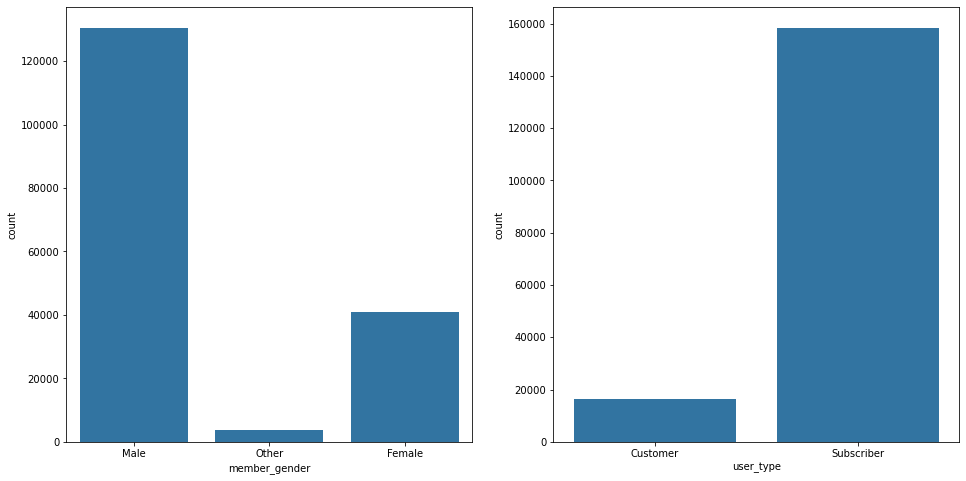

In [43]:
plt.figure(figsize=(16, 8)) 
plt.subplot(1,2,1)
sb.countplot(data = df , x = 'member_gender', color = base_color );
plt.subplot(1,2,2)
sb.countplot(data = df , x = 'user_type', color = base_color );


We here have 2 observations :<br> 
1 ) majority of users are Male. <br>
2 ) majority of users are Subsribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the variables of interest is the trip durations and to see what attributes affects it.Trip durations has some outliers however most of the durations falls under the 26 minutes.No transformations needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> changed the duration to mins instead of seconds for convenience.wrangling process is written under each cell.

## Bivariate Exploration

> Here we will take a deeper look on the trip durations against other variables that can have an effect

## Does the day affects how the duration of the trip ?

> **We will start with the Duration against the Start day:**

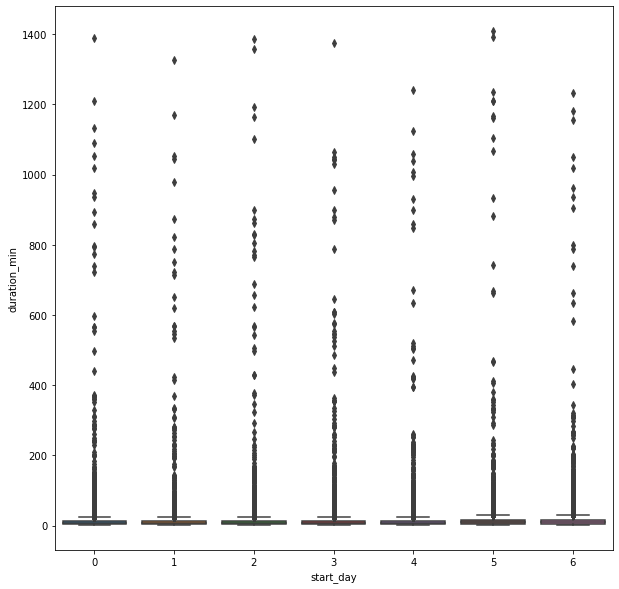

In [44]:
plt.figure(figsize=(10,10))
sb.boxplot(data = df , x = 'start_day'  , y = 'duration_min');

as We know from the univariate analysis almost all of the trip durations are between 0 and 26 so we will limit our graph to 35

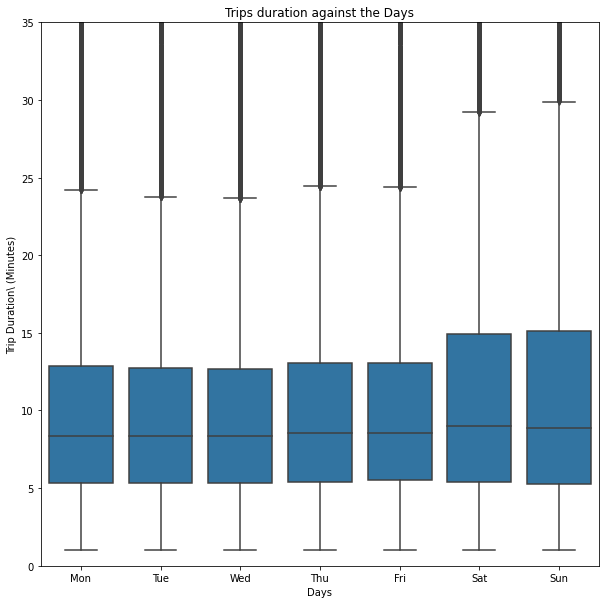

In [45]:
plt.figure(figsize=(10,10))
sb.boxplot(data = df , x = 'start_day'  , y = 'duration_min' , color= base_color);
plt.ylim(0,35);
plt.xticks([0,1,2,3,4,5,6] , ['Mon' , 'Tue' , 'Wed' , 'Thu' , 'Fri' , 'Sat' , 'Sun'])
plt.title("Trips duration against the Days")
plt.xlabel("Days");
plt.ylabel("Trip Duration\ (Minutes)");

Here we observe that the average of duration in the weekends is higher than weekdays. which makes it one of the contributing factors on the trips duration

## Does the gender and the user type affect the duration of the trips ?
>Now we will explore the duration against the user type and the gender

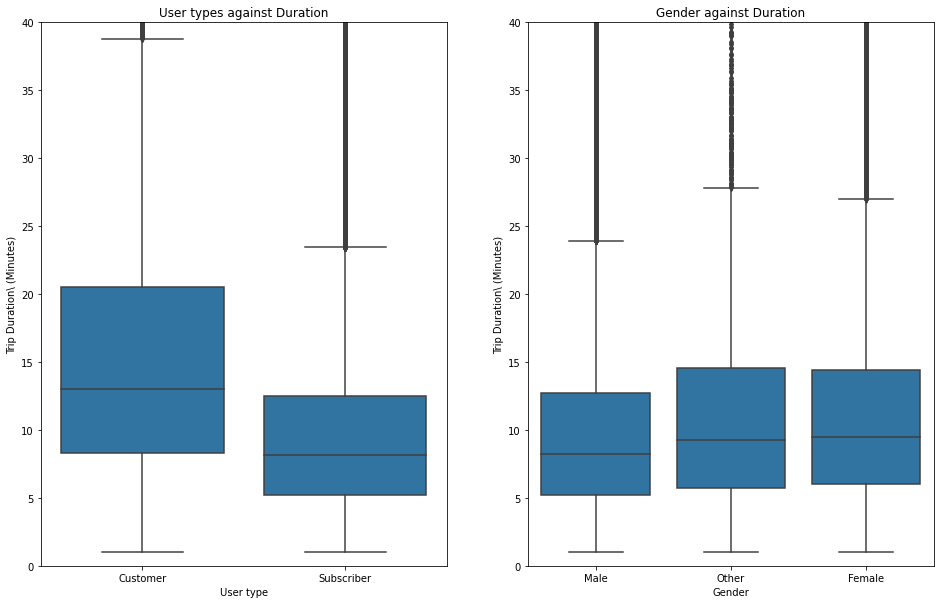

In [46]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.title("User types against Duration")
sb.boxplot(data = df , x = 'user_type'  , y = 'duration_min' , color= base_color);
plt.xlabel("User type");
plt.ylabel("Trip Duration\ (Minutes)");
plt.ylim(0,40)
plt.subplot(1,2,2)
plt.title("Gender against Duration")
sb.boxplot(data = df , x = 'member_gender'  , y = 'duration_min' , color= base_color);
plt.xlabel("Gender");
plt.ylabel("Trip Duration\ (Minutes)");
plt.ylim(0,40);

Here We have 2 observations:<br>
1) Customers have a higher average duration time compared to the Subscriber. which makes it the second contribouting factor to the trip duration<br>
2) Female & other gender have a higher average trip duration than males.however they are not that significant

## so now we ask the question, Does the age of the users affect the duration of the trips ? 
> We will now investigate the Trip Duration against the birth year of users

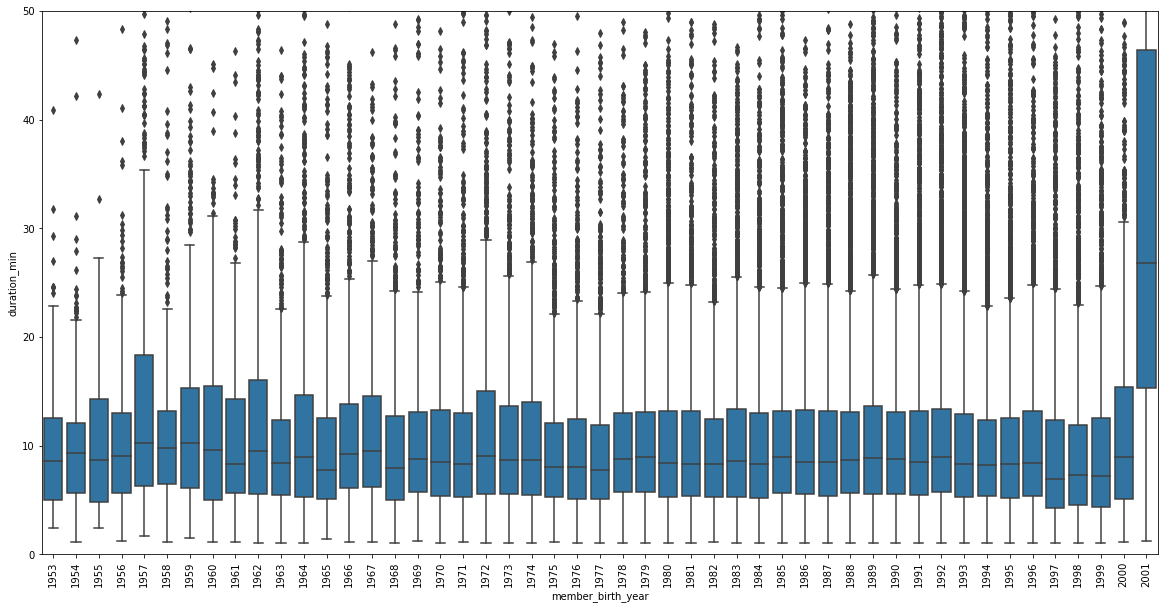

In [47]:
plt.figure(figsize=(20,10))
birthYears = df['member_birth_year'].value_counts()
order_index = np.sort(birthYears.index)

plt.ylim(0,50)
sb.boxplot(data = df , x = 'member_birth_year'  , y = 'duration_min' , color= base_color , order=order_index[26:] );
plt.xticks(rotation = 90);


Here we can see that averages of are close to each other while 2001 is very far however it is established above that the count of users with a birth year of 2001 is very small compared to other years.

## We will now take a look at distributions of user types against the gender:

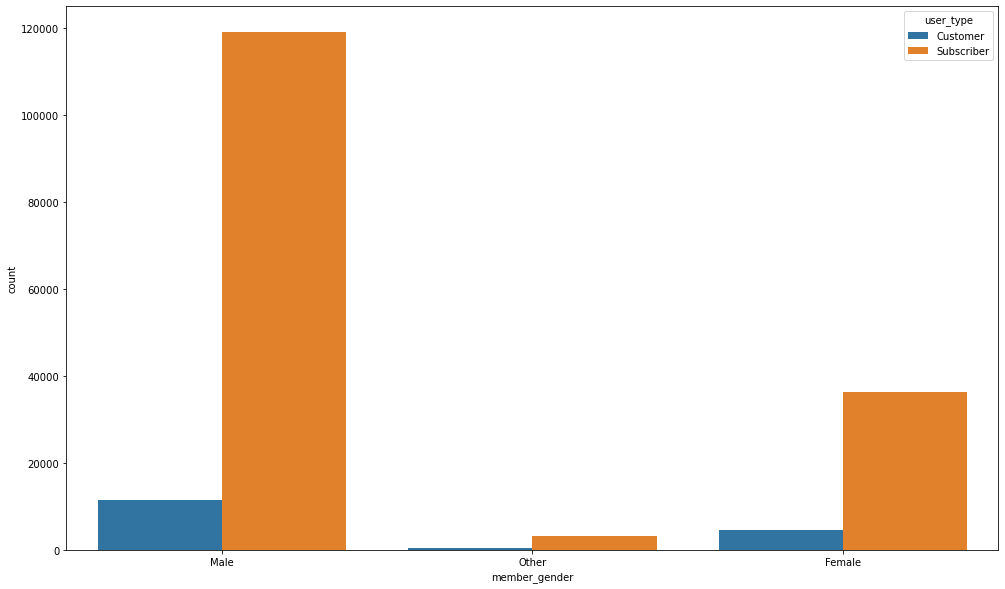

In [48]:
plt.figure(figsize=(16.7,10))
sb.countplot(data = df , x = 'member_gender' , hue = 'user_type');

here there is not something intersting

## We will now dive into the distributions gender against the day to see if there is a day that a particular gender prefers:

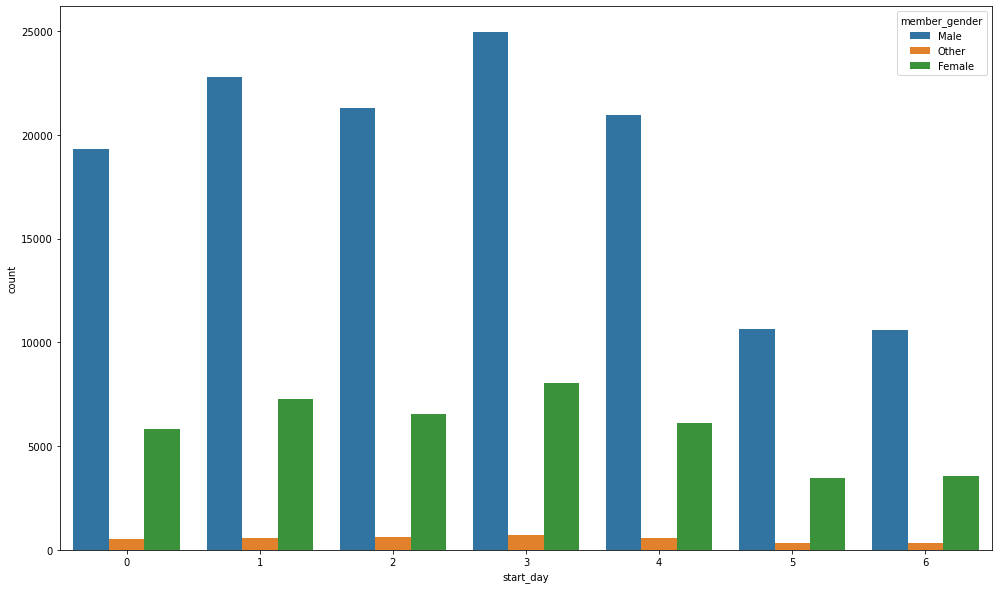

In [49]:
plt.figure(figsize=(16.7,10))
sb.countplot(data = df , x = 'start_day' , hue = 'member_gender');

Here we can see that the distribution is the same as the distrubtion of days alone for all genders.

## So,we want to know if the stations have an impact on the durations.So, We will now see the distribution of stations longitude and latitudes to create a kind of map.

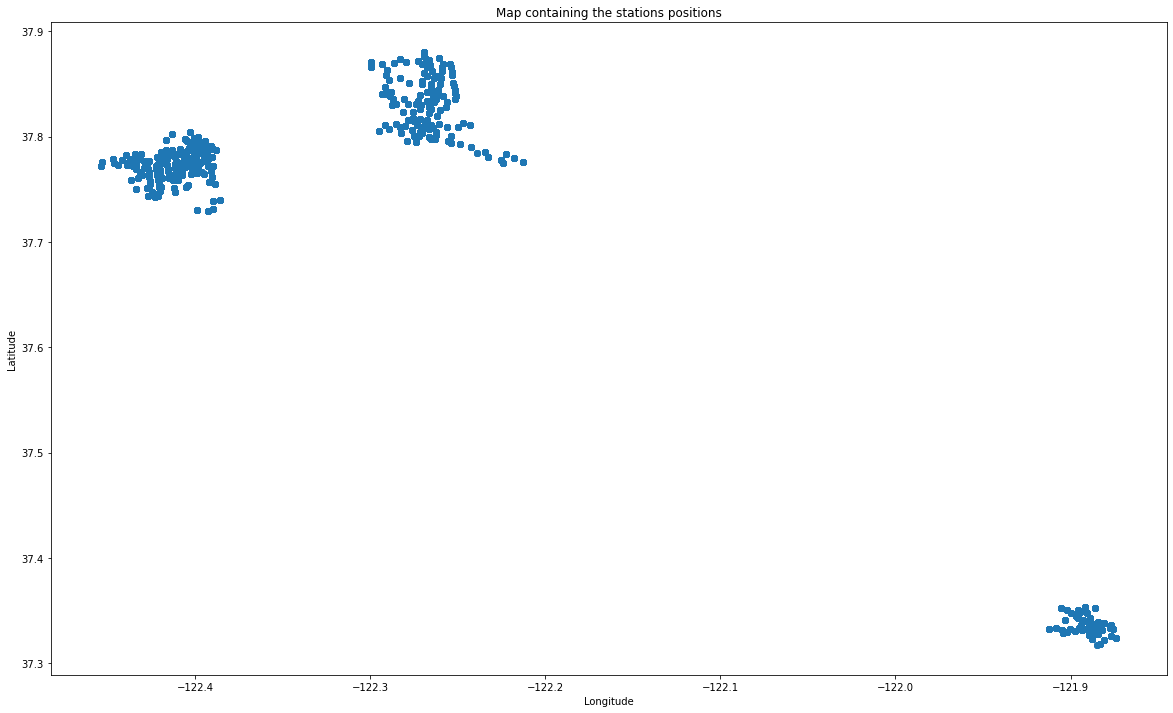

In [50]:
plt.figure(figsize=(20,12))
plt.title("Map containing the stations positions")
plt.xlabel("Longitude");
plt.ylabel("Latitude");
plt.scatter(data =df , y = 'start_station_latitude' , x = 'start_station_longitude' );

>**Intersting Note**:<br>
Something Interesting here, Here we could see the stations are clustered into 3 main clusters as shown above in this kind of map which explains the distrubtions of trips being around 6-11 minutes due to  the closeness of the stations.Here also it explains the outliers in trip durations since the clusters are far apart from each other which means the user traveled from one cluster to another. 

>**Cleaning**: <br> 
Here we can split our datasets according to location clusters and measure the trip durations for each cluster, we can split using the longitude.

In [51]:
def Startcleaning (x):
    value = 1
    if (x['start_station_longitude'] >= float(-122.35)):
        value = 2 
    if (x['start_station_longitude'] >= float(-122.0)):
        value = 3
    return value

In [52]:
df['start_cluster'] = df.apply(Startcleaning,axis =1 )


## We plot now the durations of trips against the clusters we made:


### We plot the distribution of the clusters first:

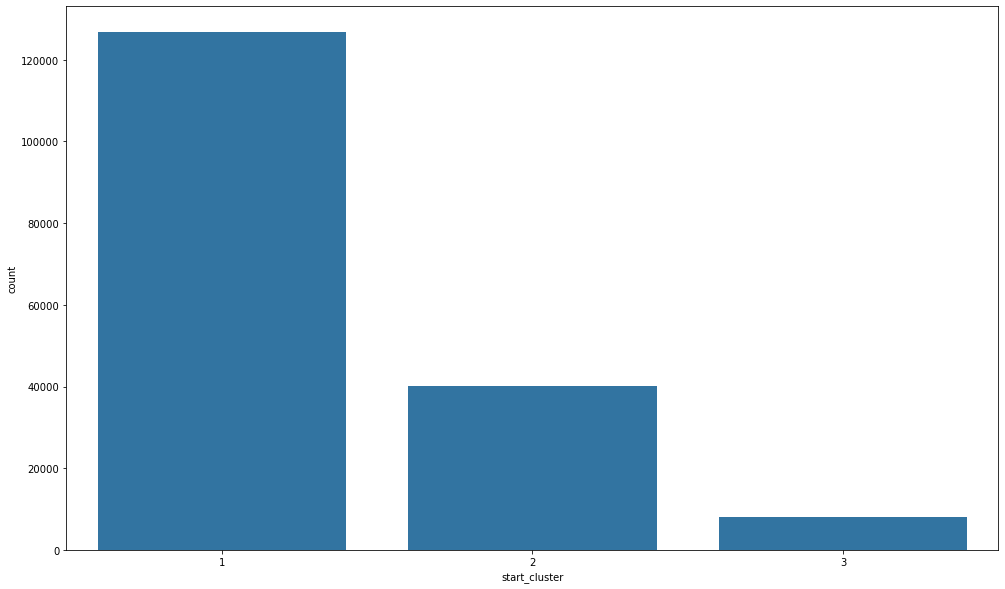

In [53]:
plt.figure(figsize=(16.7,10))
sb.countplot(data = df , x = 'start_cluster' , color= base_color);

We see that the distribution of the start and the end clusters are the same.

### We can then dive into the bivariate plot. We will use the start cluster column. Does the cluster have an effect on the duration ?  

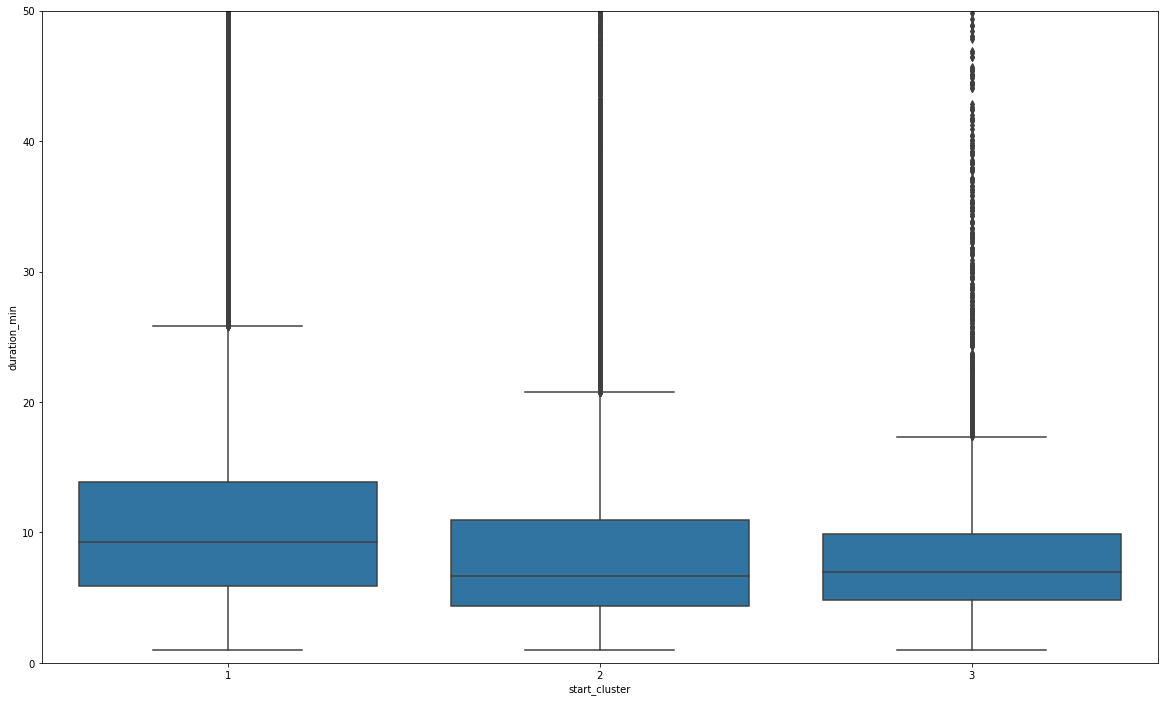

In [54]:
plt.figure(figsize=(20,12))
sb.boxplot(data = df , x = 'start_cluster' , y = 'duration_min' ,  color= base_color )
plt.ylim(0,50);

Here we can see that trips starting from cluster 1 have a higher average trips durationt than cluster 2 and cluster 3 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> No interisting relation was found however we will build upon the cluster map in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> a kind of like "map" of the stations was found and were distributed into clusters according to their closness , there were 3 distinct clusters.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## We will start by building up on the Cluster and station Locations and add the duration. Do certain starting stations for trips have longer trip durations on average or not ? 

> We will group by the station latitude and longitude and reset the index and take the mean of the group in the duration min and then plot the the grouped by data frame (latitude , longitude and duration)

In [55]:
group = df.groupby('start_station_name' ).mean().reset_index()
group.head()

,start_station_name,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,start_year,month,start_day,start_cluster
0,10th Ave at E 15th St,874.709091,222.0,37.792714,-122.248780,170.690909,37.800855,-122.263234,3702.836364,1982.763636,14.578545,2019.0,2.0,1.963636,2.0
1,10th St at Fallon St,996.976812,201.0,37.797673,-122.262997,198.185507,37.805494,-122.258566,4098.588406,1982.892754,16.616435,2019.0,2.0,2.440580,2.0
2,10th St at University Ave,819.443850,351.0,37.869060,-122.293400,246.497326,37.862061,-122.278502,4695.310160,1983.406417,13.657594,2019.0,2.0,3.197861,2.0
3,11th St at Bryant St,554.699495,88.0,37.770030,-122.411726,101.026515,37.772906,-122.411874,4451.434343,1984.950758,9.245227,2019.0,2.0,2.679293,1.0
4,11th St at Natoma St,731.332090,77.0,37.773507,-122.416040,101.129353,37.775076,-122.407560,4544.947761,1983.643035,12.188930,2019.0,2.0,2.518657,1.0


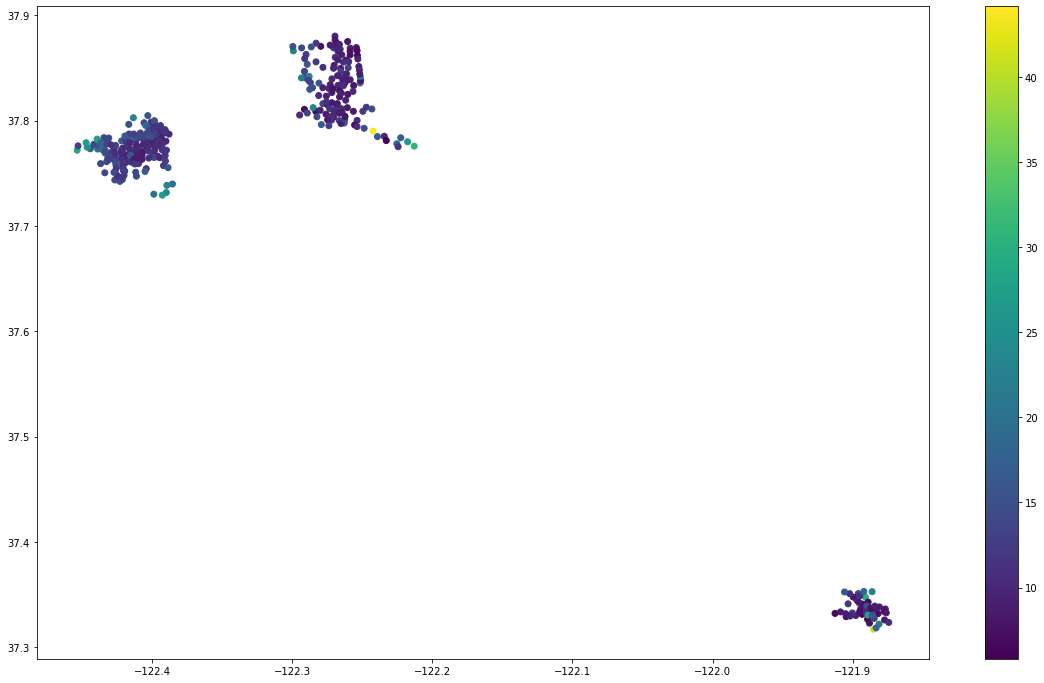

In [69]:
plt.figure(figsize=(20,12))
plt.scatter(data = group, y = 'start_station_latitude', x = 'start_station_longitude', c = 'duration_min')
plt.colorbar()


>**Very Interisting Finding**:<br> 
Looking at the station points and how are they plotted we they represent the locations of the stations on a map we can see that the trips with a higher duration tend to be on the edges rather than the center, we can then zoom on each cluster.

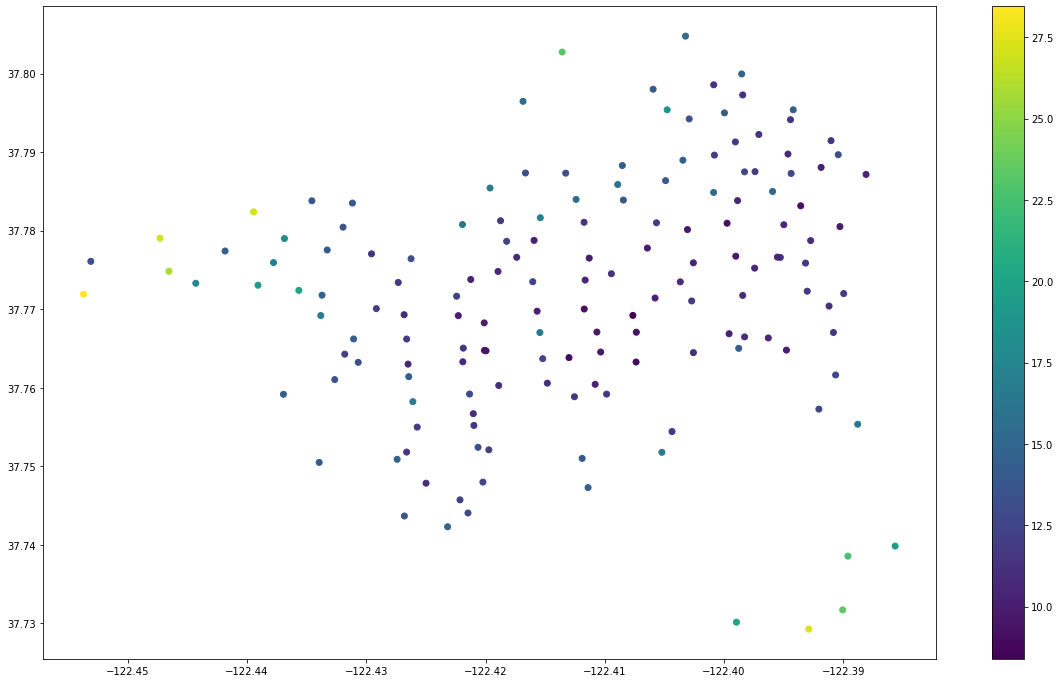

In [70]:
df1 = group.query('start_cluster ==1' )
plt.figure(figsize=(20,12))
plt.scatter(data = df1, y = 'start_station_latitude', x = 'start_station_longitude', c = 'duration_min' , cmap = 'viridis')
plt.colorbar()


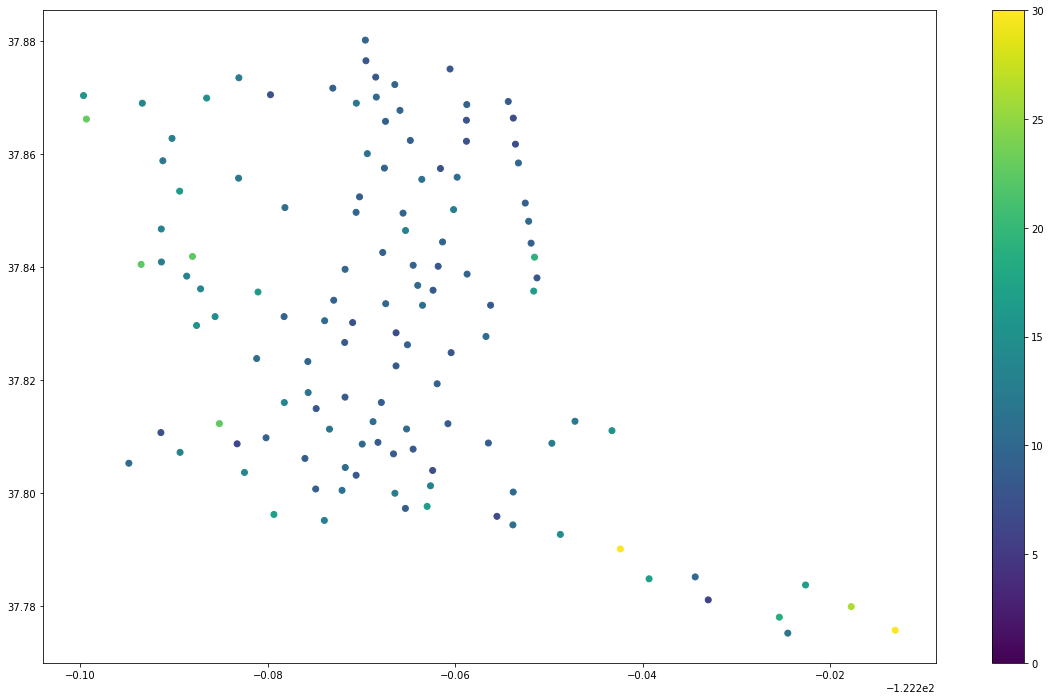

In [71]:
df1 = group.query('start_cluster ==2' )
plt.figure(figsize=(20,12))
plt.scatter(data = df1, y = 'start_station_latitude', x = 'start_station_longitude', c = 'duration_min')
plt.colorbar()
plt.clim(0,30)

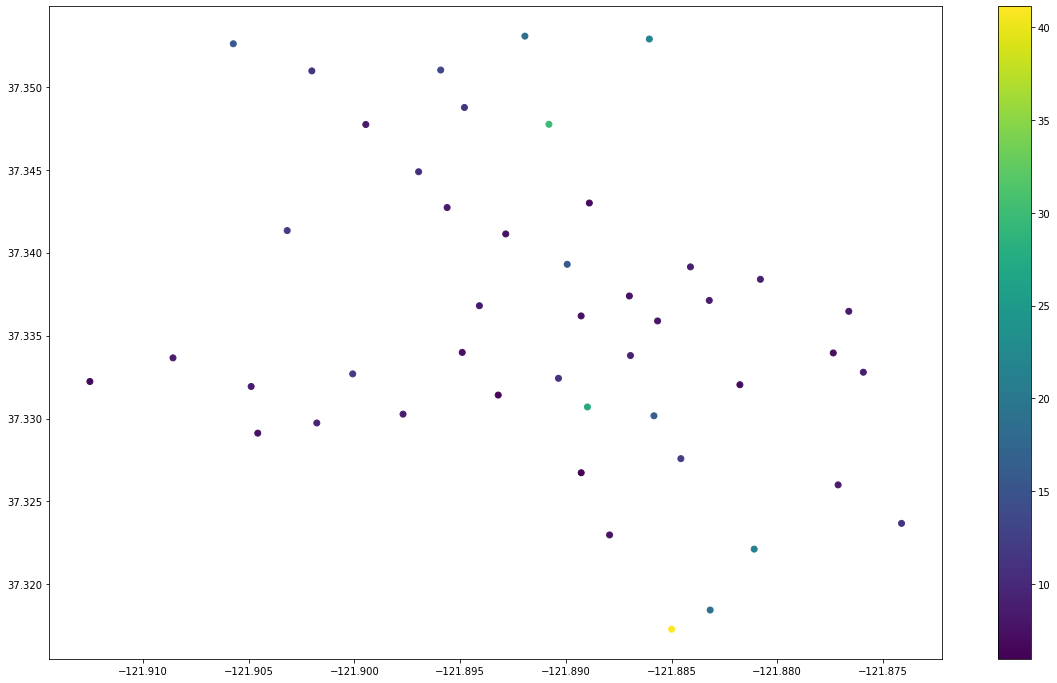

In [72]:
df1 = group.query('start_cluster ==3' )
plt.figure(figsize=(20,12))
plt.scatter(data = df1, y = 'start_station_latitude', x = 'start_station_longitude', c = 'duration_min')
plt.colorbar()


Here We can see that that a lighter tint on the outskirts of the points we studied which supports our findings.
which means that the further we are from the center the more on average the trip will take.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> YES , the duration of the trips increased as the station got further away from the center of the cluster

### Were there any interesting or surprising interactions between features?

> No.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!